In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns
import math
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
# Setting pokemon theme color palette for seaborn
colors = ['#244D8D', '#939B5E', '#E0B502', '#8A7596', '#B55540']
sns.set_palette(sns.color_palette(colors))

In [35]:
df = pd.read_csv('Pokemon.csv')

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,PC1,PC2,PC3,PC4,PC5,clusters,Clusters
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,-1.945692,-0.083421,-0.309464,0.630842,0.388726,2,Healthy
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,-0.356470,-0.117497,-0.337705,0.671505,0.238091,1,Tanky
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,1.431447,0.003488,0.179662,0.743674,-0.025186,1,Tanky
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,3.506232,0.566857,-0.948985,0.663548,0.307430,4,Speedy
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,-2.124678,-0.796365,-0.385041,0.162077,0.136921,2,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,2.895854,2.069950,-1.877240,0.999005,0.115229,3,Super
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,4.604121,-0.990386,-1.256443,-0.490803,1.215883,4,Speedy
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,3.246429,-0.550707,-0.201775,1.351248,1.241328,4,Speedy
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,4.435050,-0.910584,0.129186,0.465158,1.744217,4,Speedy


In [4]:
X = df.select_dtypes('number').copy()
X

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,1,318,45,49,49,65,65,45,1
1,2,405,60,62,63,80,80,60,1
2,3,525,80,82,83,100,100,80,1
3,3,625,80,100,123,122,120,80,1
4,4,309,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...,...,...
795,719,600,50,100,150,100,150,50,6
796,719,700,50,160,110,160,110,110,6
797,720,600,80,110,60,150,130,70,6
798,720,680,80,160,60,170,130,80,6


In [5]:
X.drop(columns=['Generation', '#'], inplace=True)

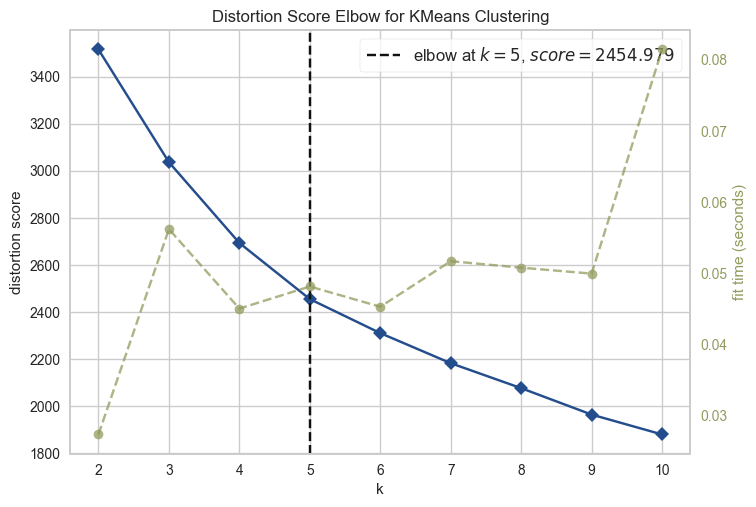

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [6]:
scaler = StandardScaler()
cluster = KElbowVisualizer(KMeans())
pipe = make_pipeline(scaler, cluster)

pipe.fit(X)
plt.savefig(transparent=True, fname='elbow.png', dpi=1000)
pipe[1].show()

In [7]:
cluster = KMeans(n_clusters=5)
pipe = make_pipeline(scaler, cluster)

pipe.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=5))])

In [8]:
X['clusters'] = pipe['kmeans'].labels_

In [9]:
df.drop(columns=['#'], inplace=True)

## Bar plot

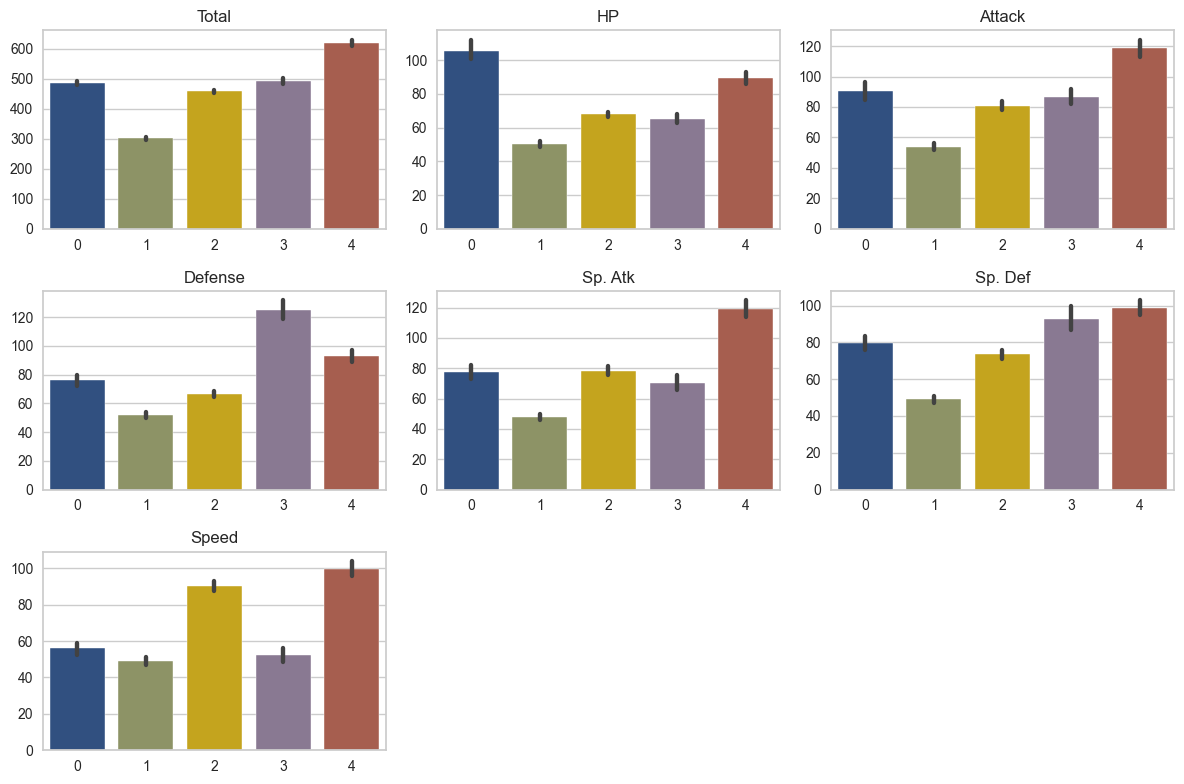

In [10]:
var_list = X.columns

cols = 3
rows = math.ceil(len(var_list)/cols)

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12,8))
# next step overwrites the ax var, so we need to put this here.
fig.delaxes(ax[2][2])
fig.delaxes(ax[2][1])

for i, ax in zip(var_list, ax.flat):
    g = sns.barplot(data=X, x='clusters', y=i, ax=ax)
    ax.set(xlabel='', ylabel='', title=i)

plt.tight_layout()
plt.show()
# todo: is this worth showing?

## PCA

In [11]:
reduce = PCA(n_components=0.9)
pca_pipe = make_pipeline(scaler, reduce, cluster)

pca_pipe.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('kmeans', KMeans(n_clusters=5))])

In [12]:
values = pca_pipe[:2].transform(X)

pca_labels = [f'PC{idx+1}' for idx, i in enumerate(values.T)]

df = df.join(pd.DataFrame(values, columns=pca_labels))

df['clusters'] = pipe['kmeans'].labels_

<Axes: xlabel='PC1', ylabel='PC2'>

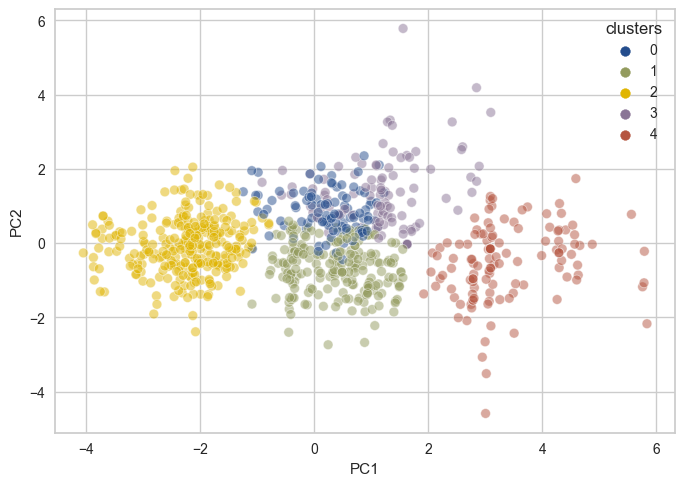

In [13]:
sns.scatterplot(data=df, x='PC1', y='PC2', hue='clusters', alpha=0.5, palette=sns.color_palette())

<Axes: xlabel='PC1', ylabel='PC2'>

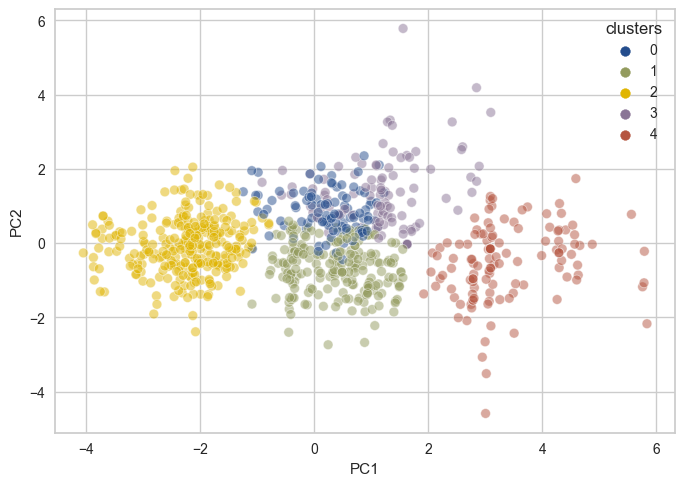

In [14]:
sns.scatterplot(data=df, x='PC1', y='PC2', hue='clusters', alpha=0.5, palette=sns.color_palette())
# todo: find good comparisons, beautify
# todo: put picture of pokemon over the clusters, play whos that pokemon

<Axes: xlabel='Attack', ylabel='Total'>

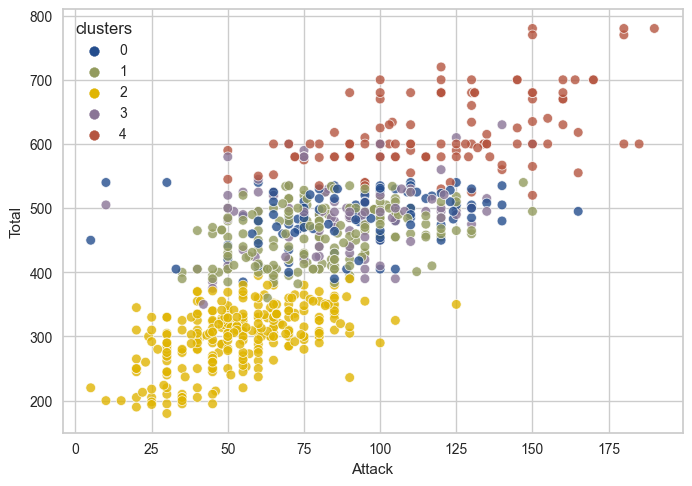

In [15]:
sns.scatterplot(data=df, x=df['Attack'], y=df['Total'], hue=df['clusters'], alpha=0.8, palette=sns.color_palette())

<Axes: xlabel='Defense', ylabel='Total'>

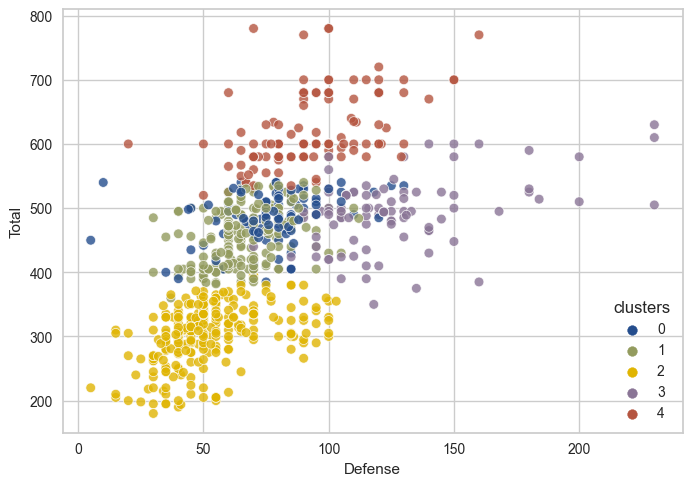

In [16]:
sns.scatterplot(data=df, x=df['Defense'], y=df['Total'], hue=df['clusters'], alpha=0.8, palette=sns.color_palette())

In [17]:
df.groupby('clusters')['Total'].mean()

clusters
0    485.240000
1    457.580000
2    302.231317
3    492.234694
4    618.809917
Name: Total, dtype: float64

## Cluster plot

In [18]:
df['Clusters'] = df['clusters'].map({0:'Weak but cute',
                    1:'Tanky',
                    2:'Healthy',
                    3:'Super',
                    4:'Speedy',
})

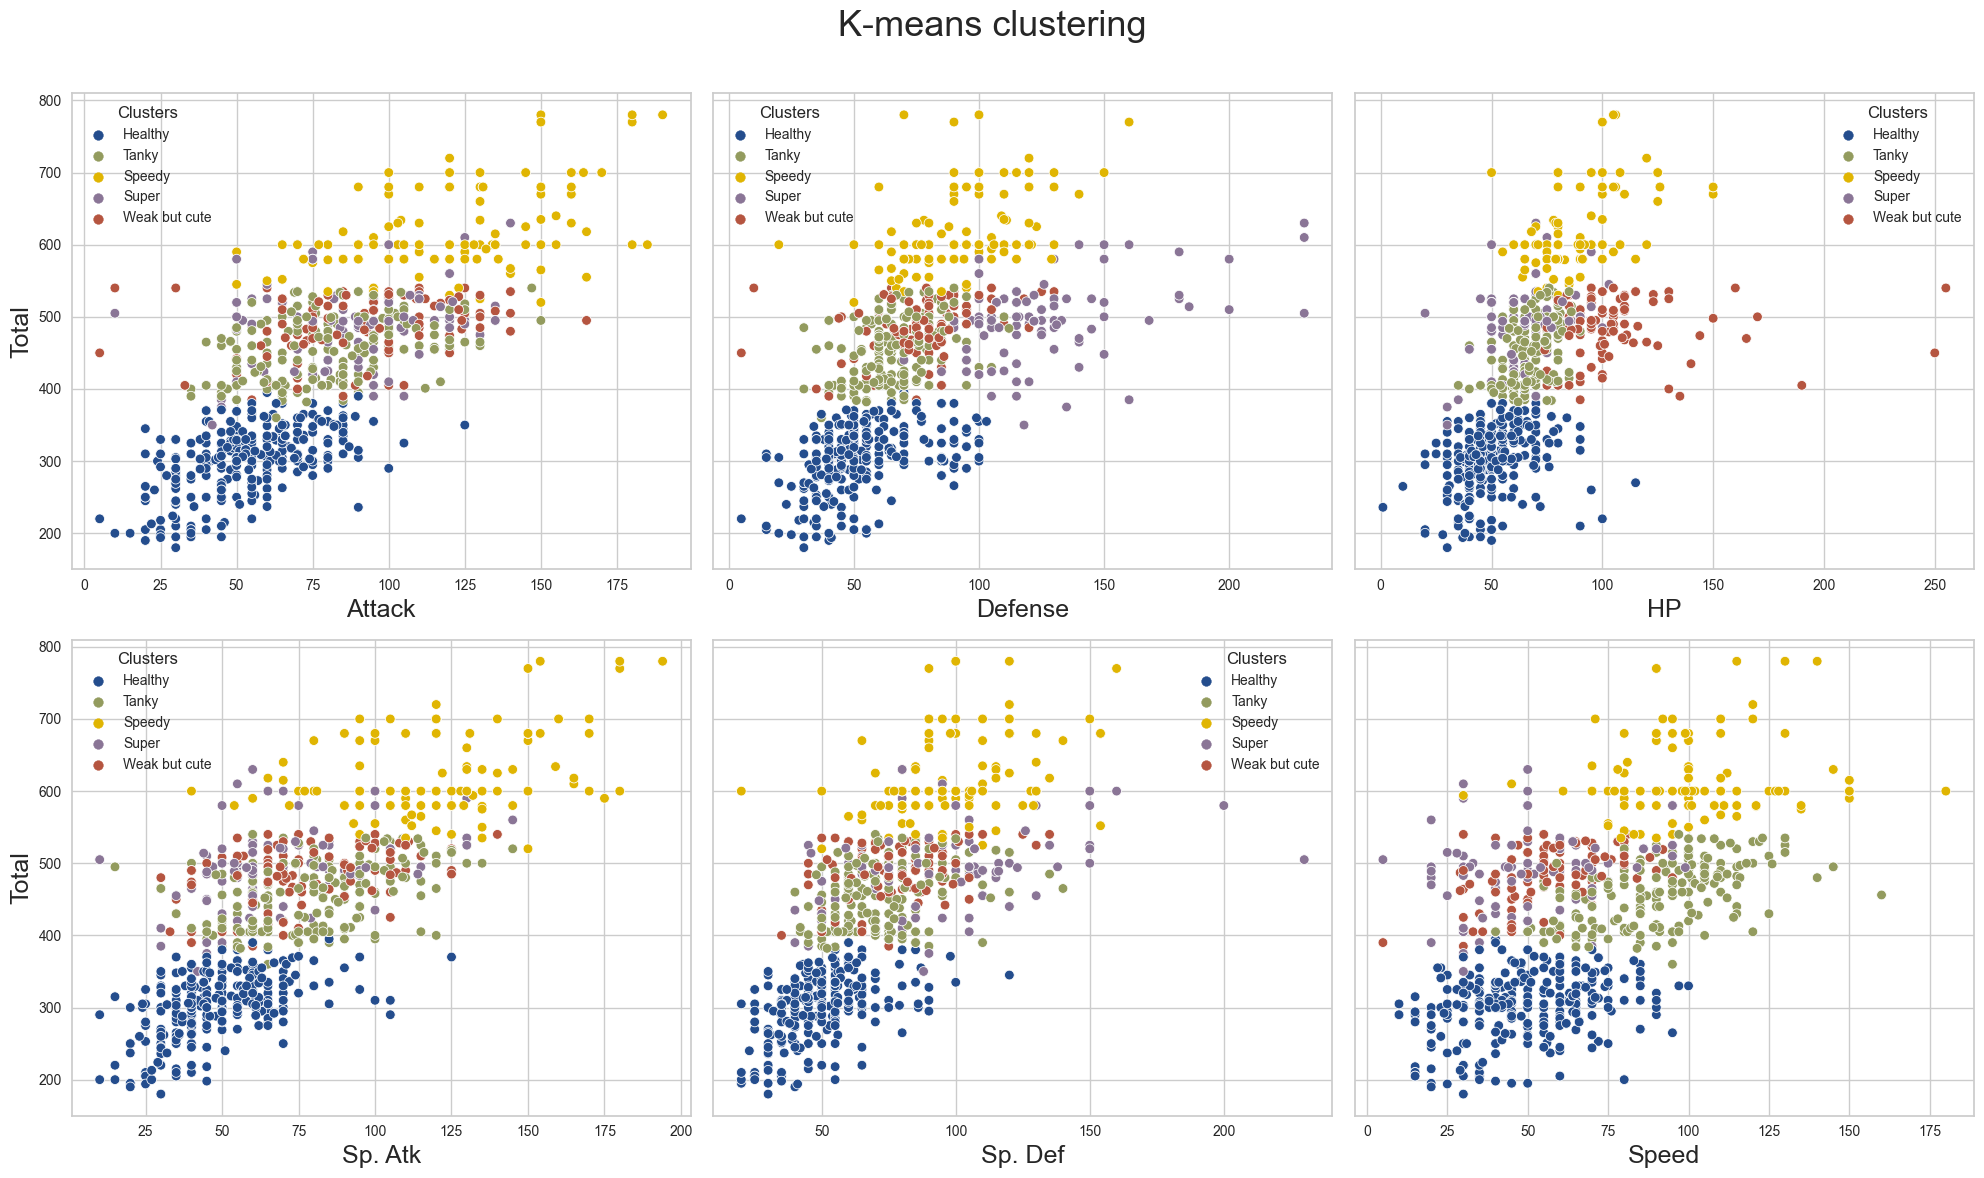

In [19]:
fig, ax = plt.subplots(2,3, figsize=(20,12), sharey=True)
a = sns.scatterplot(data=df, y='Total', x='Attack',  hue='Clusters', palette=sns.color_palette(), ax=ax[0][0])
sns.scatterplot(data=df, y='Total', x='Defense', hue='Clusters', palette=sns.color_palette(), ax=ax[0][1]).set_xlabel('Defense', fontsize=18)
sns.scatterplot(data=df, y='Total', x='HP',      hue='Clusters', palette=sns.color_palette(), ax=ax[0][2]).set_xlabel('HP', fontsize=18)
b = sns.scatterplot(data=df, y='Total', x='Sp. Atk', hue='Clusters', palette=sns.color_palette(), ax=ax[1][0])
sns.scatterplot(data=df, y='Total', x='Sp. Def', hue='Clusters', palette=sns.color_palette(), ax=ax[1][1]).set_xlabel('Sp. Def', fontsize=18)
sns.scatterplot(data=df, y='Total', x='Speed',   hue='Clusters', palette=sns.color_palette(), ax=ax[1][2]).set_xlabel('Speed', fontsize=18)

a.set_ylabel('Total', fontsize=18)
b.set_ylabel('Total', fontsize=18)
a.set_xlabel('Attack', fontsize=18)
b.set_xlabel('Sp. Atk', fontsize=18)

plt.legend('')

fig.suptitle('K-means clustering\n', fontsize=26, font='Arial')
plt.tight_layout()
plt.savefig(transparent=True, fname='Kmeans clustering.png')
plt.show()
# highlight the ones you try to compare, opacity lower on other ones

In [20]:
print('Cluster 0', df.loc[df.clusters == 0].Total.mean())
print('Cluster 1', df.loc[df.clusters == 1].Total.mean())
print('Cluster 2', df.loc[df.clusters == 2].Total.mean())
print('Cluster 3', df.loc[df.clusters == 3].Total.mean())
print('Cluster 4', df.loc[df.clusters == 4].Total.mean())

Cluster 0 485.24
Cluster 1 457.58
Cluster 2 302.2313167259787
Cluster 3 492.234693877551
Cluster 4 618.8099173553719


## Exclude weak and strong pokemon

In [21]:
df_filtered = df.loc[(df.clusters != 0) & (df.clusters != 3)]

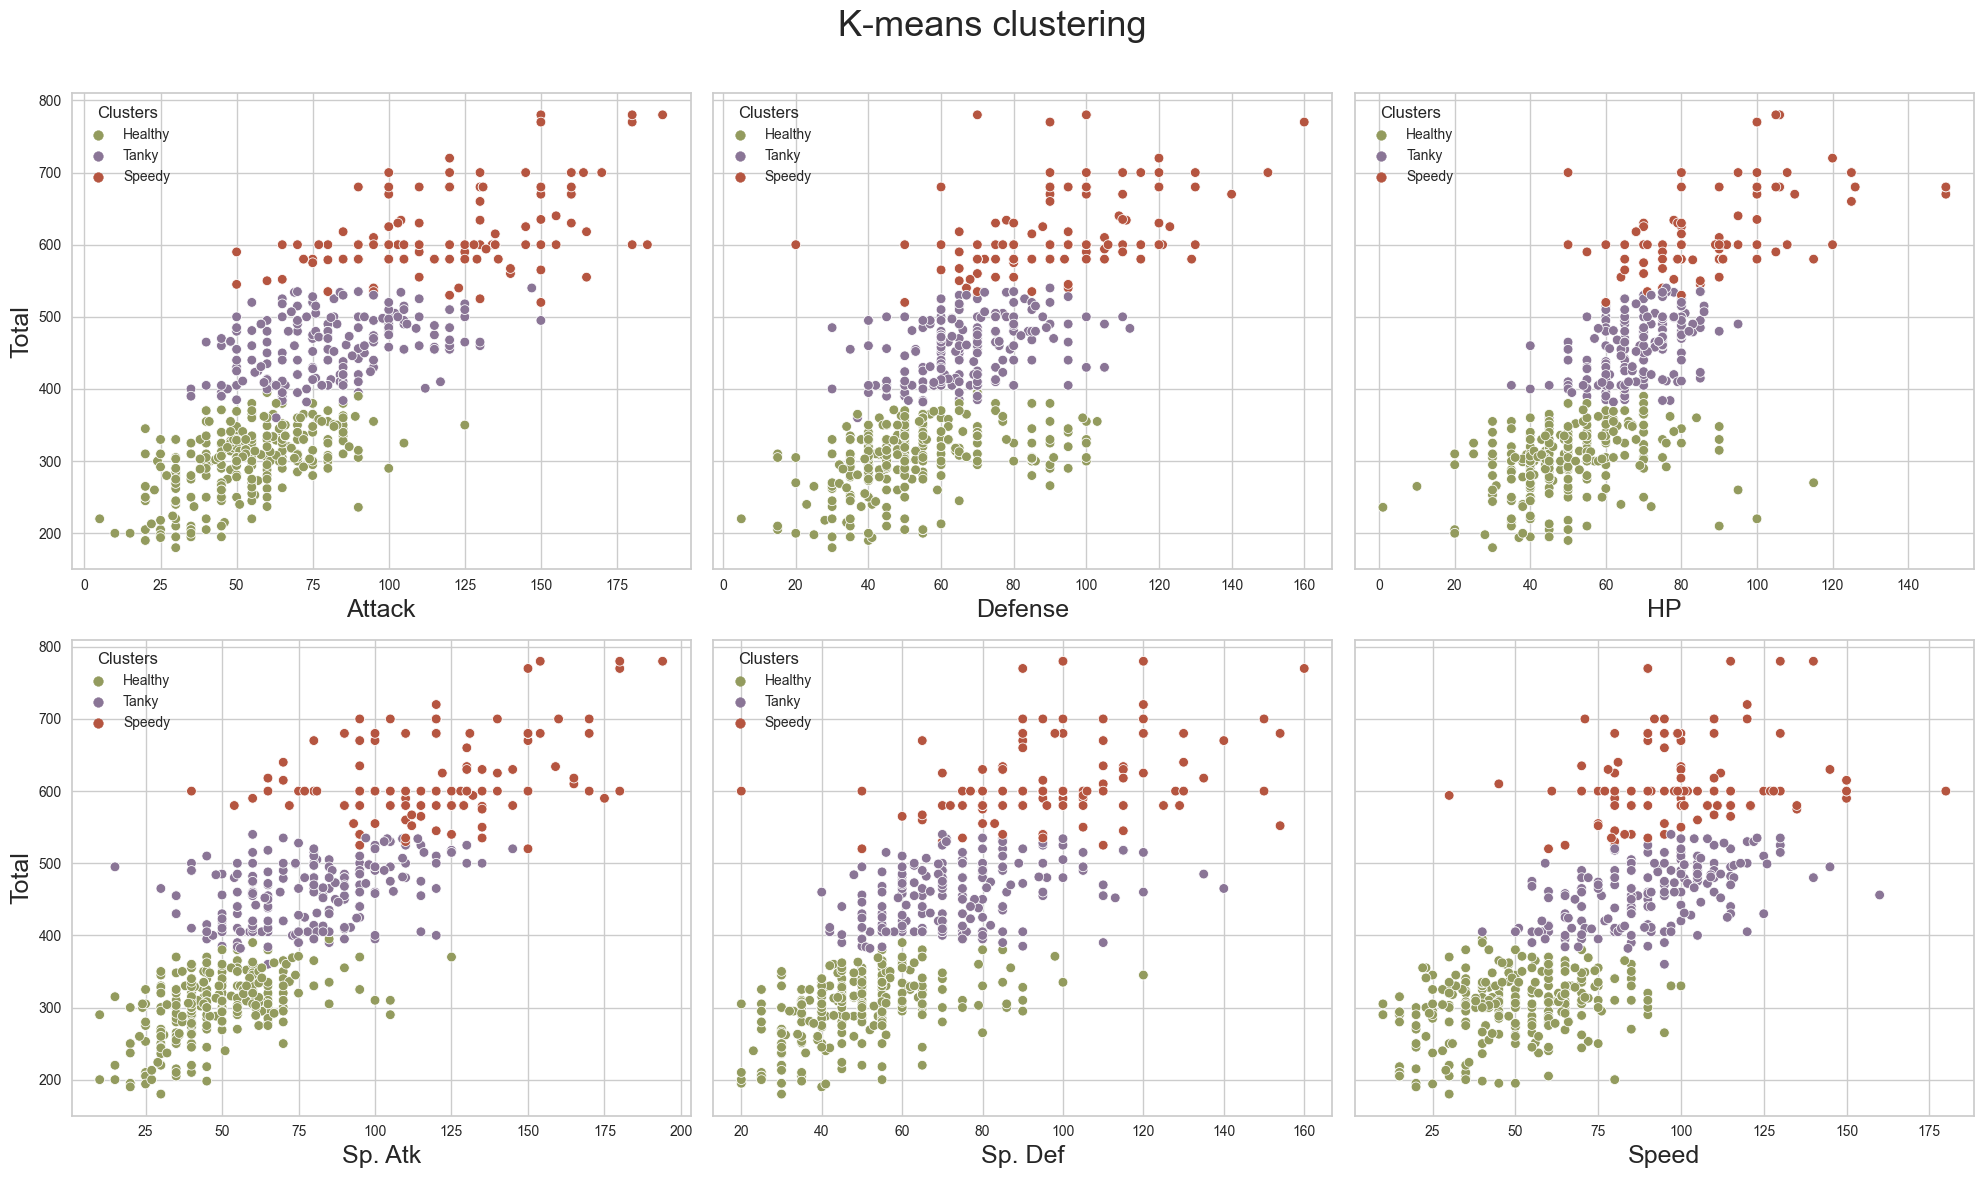

In [22]:
fig, ax = plt.subplots(2,3, figsize=(20,12), sharey=True)
a = sns.scatterplot(data=df_filtered, y='Total', x='Attack',  hue='Clusters', palette=[colors[1], colors[3], colors[4]], ax=ax[0][0])
sns.scatterplot(data=df_filtered, y='Total', x='Defense', hue='Clusters', palette=[colors[1], colors[3], colors[4]], ax=ax[0][1]).set_xlabel('Defense', fontsize=18)
sns.scatterplot(data=df_filtered, y='Total', x='HP',      hue='Clusters', palette=[colors[1], colors[3], colors[4]], ax=ax[0][2]).set_xlabel('HP', fontsize=18)
b = sns.scatterplot(data=df_filtered, y='Total', x='Sp. Atk', hue='Clusters', palette=[colors[1], colors[3], colors[4]], ax=ax[1][0])
sns.scatterplot(data=df_filtered, y='Total', x='Sp. Def', hue='Clusters', palette=[colors[1], colors[3], colors[4]], ax=ax[1][1]).set_xlabel('Sp. Def', fontsize=18)
sns.scatterplot(data=df_filtered, y='Total', x='Speed',   hue='Clusters', palette=[colors[1], colors[3], colors[4]], ax=ax[1][2]).set_xlabel('Speed', fontsize=18)

a.set_ylabel('Total', fontsize=18)
b.set_ylabel('Total', fontsize=18)
a.set_xlabel('Attack', fontsize=18)
b.set_xlabel('Sp. Atk', fontsize=18)

plt.legend('')

fig.suptitle('K-means clustering\n', fontsize=26, font='Arial')
plt.tight_layout()
plt.savefig(transparent=True, fname='Kmeans clustering2.png')
plt.show()
# highlight the ones you try to compare, opacity lower on other ones

*Blue(cluster0) and yellow(2) are grouped together on the scatter plots from before, but here it is apparent that while they have equal total stats, blue have more defense while having less speed than yellow

 What characterizes cluster 4(brown)?

## SPIDER PLOT

In [23]:
# A df for every cluster, mean aggregation
radar_0 = pd.DataFrame(df.loc[df.clusters == 0][['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].mean()).reset_index()
radar_1 = pd.DataFrame(df.loc[df.clusters == 1][['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].mean()).reset_index()
radar_2 = pd.DataFrame(df.loc[df.clusters == 2][['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].mean()).reset_index()
radar_3 = pd.DataFrame(df.loc[df.clusters == 3][['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].mean()).reset_index()
radar_4 = pd.DataFrame(df.loc[df.clusters == 4][['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].mean()).reset_index()

In [24]:
radar_0

,index,0
0,HP,105.63
1,Attack,90.28
2,Defense,75.98
3,Sp. Atk,77.83
4,Sp. Def,79.56
5,Speed,55.96


In [25]:
radar_0 = radar_0.reindex([0,1,3,5,4,2])
radar_1 = radar_1.reindex([0,1,3,5,4,2])
radar_2 = radar_2.reindex([0,1,3,5,4,2])
radar_3 = radar_3.reindex([0,1,3,5,4,2])
radar_4 = radar_4.reindex([0,1,3,5,4,2])

In [34]:
px.line_polar(
              radar_0,
              r=radar_0[0],
              theta=radar_0['index'],
              line_close=True,
              line_shape='spline',
              title='Cluster 0',
              range_r=(0, 130)).update_traces(fill='toself', line_color=colors[0]).show()

px.line_polar(radar_1,
              r=radar_1[0],
              theta=radar_1['index'],
              line_close=True,
              line_shape='spline',
              title='Cluster 1',
              range_r=(0, 130)).update_traces(fill='toself', line_color=colors[3]).show()


px.line_polar(radar_2,
              r=radar_2[0],
              theta=radar_2['index'],
              line_close=True,
              line_shape='spline',
              title='Cluster 2',
              range_r=(0, 130)).update_traces(fill='toself', line_color=colors[2]).show()


px.line_polar(radar_3,
              r=radar_3[0],
              theta=radar_3['index'],
              line_close=True,
              line_shape='spline',
              title='Cluster 3',
              range_r=(0, 130)).update_traces(fill='toself', line_color=colors[1]).show()


px.line_polar(radar_4,
              r=radar_4[0],
              theta=radar_4['index'],
              line_close=True,
              line_shape='spline',
              title='Cluster 4',
              range_r=(0, 130)).update_traces(fill='toself', line_color=colors[1]).show()

/Users/gavinnguyen/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/Users/gavinnguyen/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/Users/gavinnguyen/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/Users/gavinnguyen/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/Users/gavinnguyen/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



## compare speedy and tanky

In [27]:
# reshaping data for double spider plot
radar_3['Group'] = ['Speedy'] * len(radar_3)
radar_4['Group'] = ['Tanky'] * len(radar_4)

In [28]:
radar_3_4 = pd.concat([radar_3, radar_4])

In [29]:
px.line_polar(radar_3_4,
              r=radar_3_4[0],
              theta=radar_3_4['index'],
              line_close=True,
              line_shape='spline',
              title='Speedy and Tanky pokemon',
              range_r=(0, 130),
              color='Group',
              color_discrete_map={'Speedy':colors[2], 'Tanky':colors[3]}).update_traces(fill='toself').show()

/Users/gavinnguyen/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/gavinnguyen/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



## Compare speedy and healthy

In [30]:
# reshaping data for double spider plot
radar_0['Group'] = ['Healthy'] * len(radar_0)
radar_3_0 = pd.concat([radar_3, radar_0])
radar_3_0

,index,0,Group
0,HP,65.295918,Speedy
1,Attack,86.816327,Speedy
3,Sp. Atk,70.010204,Speedy
5,Speed,52.397959,Speedy
4,Sp. Def,92.795918,Speedy
2,Defense,124.918367,Speedy
0,HP,105.630000,Healthy
1,Attack,90.280000,Healthy
3,Sp. Atk,77.830000,Healthy
5,Speed,55.960000,Healthy


In [31]:
fig = px.line_polar(radar_3_0,
              r=radar_3_0[0],
              theta=radar_3_0['index'],
              line_close=True,
              line_shape='spline',
              title='Speedy and Healthy pokemon',
              range_r=(0, 130),
              color='Group',
              color_discrete_map={'Speedy':colors[2], 'Healthy':colors[0]},
              )
fig.update_traces(fill='toself')
fig.show()

/Users/gavinnguyen/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/gavinnguyen/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

